In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
from scipy.stats import sem
import numpy as np

# Study data files
mouse_metadata = "C:/Users/iezik/Desktop/USC/usc-la-data-pt-12-2020-u-c/unit_05_matplotlib/homework/Pymaceuticals/data/Mouse_metadata.csv"
study_results = "C:/Users/iezik/Desktop/USC/usc-la-data-pt-12-2020-u-c/unit_05_matplotlib/homework/Pymaceuticals/data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata)
study_results = pd.read_csv(study_results)

# Combine the data into a single dataset
data_df = pd.merge(mouse_metadata, study_results, how='outer', on='Mouse ID')
data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [ ]:
##Summary statistics

In [3]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group data by Drug Regimen
summary_df = data_df.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and sem for each drug
tumor_mean = summary_df['Tumor Volume (mm3)'].mean()
tumor_median = summary_df['Tumor Volume (mm3)'].median()
tumor_stdev = summary_df['Tumor Volume (mm3)'].std()
tumor_sem = summary_df['Tumor Volume (mm3)'].sem()

# Create DataFrame to summarize calculations
summary_grouped_df = pd.DataFrame({'Mean': tumor_mean, 'Median': tumor_median,
                                   'Standard Deviation': tumor_stdev, 'SEM': tumor_sem})

summary_grouped_df.head()

,Mean,Median,Standard Deviation,SEM
Drug Regimen,,,,
Capomulin,40.675741,41.557809,4.994774,0.329346
Ceftamin,52.591172,51.776157,6.268188,0.469821
Infubinol,52.884795,51.820584,6.567243,0.492236
Ketapril,55.235638,53.698743,8.279709,0.603860
Naftisol,54.331565,52.509285,8.134708,0.596466


In [ ]:
##Bar plot

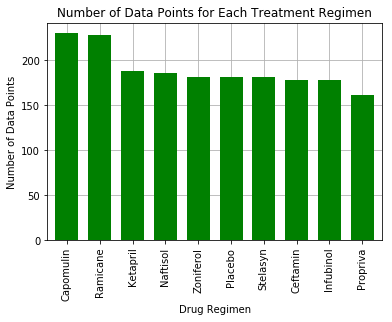

In [10]:
# Generate a bar plot showing number of data points for each treatment regimen using pandas

# Plot a bar chart (.plot.bar()) based on the amount of data points (.value_counts())
# for each treatment regimen (data_df['Drug Regimen'])
bar_plot = data_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3, color = "green")

# Set labels for axes
bar_plot.set_xlabel("Drug Regimen")
bar_plot.set_ylabel("Number of Data Points")
bar_plot.set_title("Number of Data Points for Each Treatment Regimen")

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
bar_plot.grid(zorder=0)

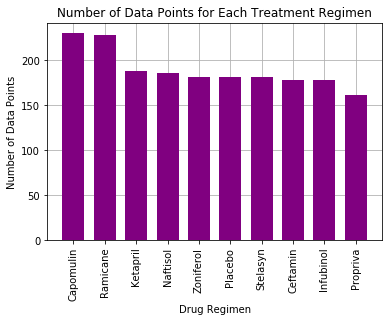

In [11]:
# Generate a bar plot showing number of data points for each treatment regimen using pyplot

# Calculate the amount of data points for each drug regimen
counts = data_df['Drug Regimen'].value_counts()

# Set the x_axis to the length of the 'counts' series
x_axis = np.arange(len(counts))

# Generate a bar blot with the length of the 'counts' series
# as the amount of values on the x axis, and the corresponding values
# in the series as the y values
plt.bar(x_axis, counts, width = 0.7, zorder=3, color = "purple")

# Label the tick marks according to the index values in the 'counts' series
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, counts.index.values)

# Rotate tick marks 90 degrees for visibility
plt.xticks(rotation=90)

# Set labels for axes
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Data Points")
plt.title('Number of Data Points for Each Treatment Regimen')

# Create a grid - using 'zorder' places grid behind the bars since we set their z-order higher
plt.grid(zorder=0)

# Display resulting plot
plt.show()

In [ ]:
##Pie plots

Text(0,0.5,'')

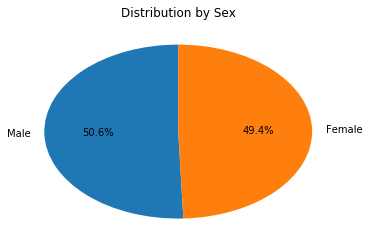

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

# Identify distribution of data by sex
data = data_df['Sex'].value_counts()

# Plot a pie chart filled with corresponding percentages and displayed vertically
pie_plot = data.plot.pie(autopct="%1.1f%%", startangle=90, title='Distribution by Sex')

# Hide the 'y' label
pie_plot.set_ylabel('')

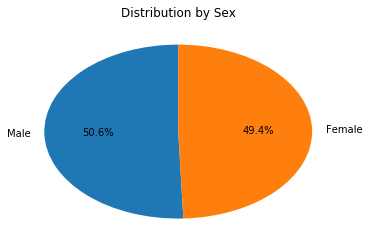

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

# Identify distribution of data by sex
data = data_df['Sex'].value_counts()

# Tell matplotlib to create a pie chart filled with corresponding percentages and displayed vertically
plt.pie(data, labels=data.index.values, autopct="%1.1f%%", startangle=90)
plt.title('Distribution by Sex')

# Display resulting plot
plt.show()

In [ ]:
 ## Quartiles, outliers and boxplots

In [15]:
# Find max timepoint for each mouse

max_tp_df = pd.DataFrame(data_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'Max_Timepoint'})
max_tp_df

# Merge max timepoint onto data_df
merged_df = pd.merge(data_df, max_tp_df, on='Mouse ID')
merged_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Max_Timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [17]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens.
# Calculate the IQR and quantitatively determine if there are any potential outliers.

# Create subset dataframe representing only the four following drug regimens
# ***NOTE*** must run previous cells in order for this cell to work

drugs = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
drug_values = []

# Locate each drug from our list 'drugs' in the orginal dataframe
for drug in drugs:
    
    temp_df = merged_df.loc[merged_df['Drug Regimen'] == drug]

    # Create subset dataframes that narrow down to rows only containing the final timepoint for each regimen
    final_volume_df = temp_df.loc[temp_df['Timepoint'] == temp_df['Max_Timepoint']]
    
    # Create a series that consists of all final volume values for each regimen
    values = final_volume_df['Tumor Volume (mm3)']
    drug_values.append(values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quartiles = values.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f'IQR for {drug}: {iqr}')
    
    # Find upper and lower bounds to help identify outliers for each regimen
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f'Lower Bound for {drug}: {lower_bound}')
    print(f'Upper Bound for {drug}: {upper_bound}')
    
    # Quantitatively check for outliers
    outliers_count = (values.loc[(final_volume_df['Tumor Volume (mm3)'] >= upper_bound) | 
                                        (final_volume_df['Tumor Volume (mm3)'] <= lower_bound)]).count()
    print(f'Number of {drug} outliers: {outliers_count}')

IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


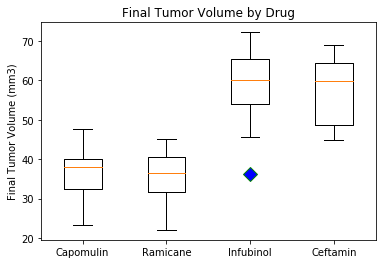

In [19]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

# ***NOTE*** must run previous cells in order for this cell to work

# Edit outliers on boxplot for visibility
flierprops = dict(marker='D', markerfacecolor='b', markersize=10, markeredgecolor='green')

# Plot boxplot
plt.boxplot(drug_values, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Volume by Drug')
plt.ylabel('Final Tumor Volume (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


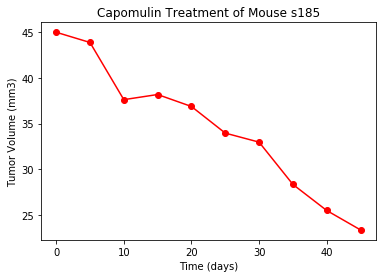

In [21]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

# Identify data points of a mouse treated with Capomulin
mouse = data_df.loc[data_df['Mouse ID'] == 's185']

# Plot a line chart with the time values on the x-axis and the tumor volume values on the y-axis
# marker = 'o' adds circles on each data point for visibility
plt.plot(mouse['Timepoint'], mouse['Tumor Volume (mm3)'], marker = 'o', color = "r")

# Add labels and title to plot
plt.xlabel("Time (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin Treatment of Mouse s185")

# Display plot
plt.show()

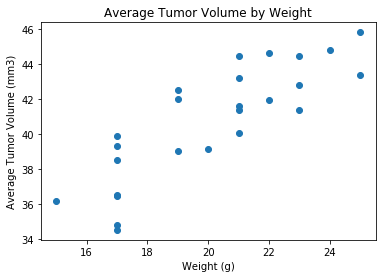

In [22]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

# Isolate cases that only use the Capomulin regimen
capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merge average tumor volume onto data_df and drop duplicates
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df

x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Create a scatter plot based on new dataframe above with circle markers and listed colors
plt.scatter(x, y)

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
# Display plot
plt.show()

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:2062: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:248: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\iezik\Anaconda3\lib\site-packages\matplotlib\axes\_base.py:250: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


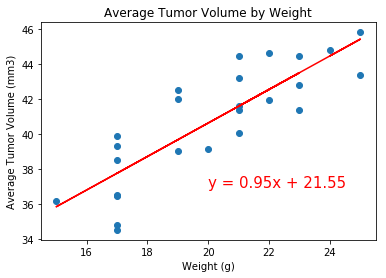

In [23]:
# Calculate the correlation coefficient and linear regression model for mouse weight and average tumor volume for the Capomulin regimen

# Duplicate code for scatter plot from above:

capomulin_df = data_df.loc[data_df['Drug Regimen'] == 'Capomulin']
avg_vol_df = pd.DataFrame(capomulin_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_vol_df = pd.merge(capomulin_df, avg_vol_df, on='Mouse ID')
final_avg_vol_df = avg_vol_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_vol_df
x = final_avg_vol_df['Weight (g)']
y = final_avg_vol_df['avg_tumor_vol']

# Calculate the correlation coefficient between mouse weight and average tumor volume
correlation = st.pearsonr(x,y)

# Print the answer to above calculation
print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlation[0],2)}.""")

# Calculate linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot linear regression on top of scatter plot
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")

# Annotate linear regression
plt.annotate(line_eq,(20,37),fontsize=15,color="red")

# Add labels and title to plot
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title('Average Tumor Volume by Weight')
plt.show()